In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix



In [6]:
df=pd.read_csv('C:\\Users\\cheul\\Downloads\\iris.data')

In [7]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [12]:
df.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
le=LabelEncoder()


In [9]:
x=df.iloc[:,0:3]

In [17]:
y=df['Iris-setosa']


In [19]:
obj=StandardScaler()

In [20]:
x=obj.fit_transform(x)


In [21]:
le.fit_transform(['Iris-setosa','Iris-versicolor','Iris-virginica'])

array([0, 1, 2], dtype=int64)

In [23]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.3)


In [28]:
knn=KNeighborsClassifier(n_neighbors=5)

In [29]:
knn.fit(xtrain,ytrain)
print(knn.score(xtest,ytest))

0.8888888888888888


In [40]:
ypred=knn.predict(xtest)


In [46]:
confusion_matrix(ytest,ypred)

array([[14,  1,  0],
       [ 0, 13,  2],
       [ 0,  2, 13]], dtype=int64)

In [47]:
k_range=range(1,26)


In [48]:
error1={}
errorlist=[]



In [51]:
for k in k_range:
 knn=KNeighborsClassifier(n_neighbors=k)
 knn.fit(xtrain,ytrain)
 ypred=knn.predict(xtest)
 error1[k]=1-metrics.accuracy_score(ytest,ypred)
 errorlist.append(1-metrics.accuracy_score(ytest,ypred))

In [52]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error')

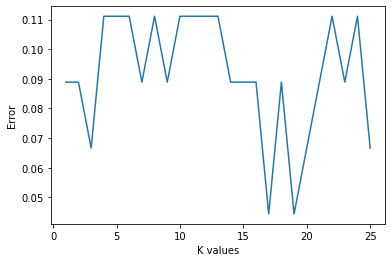

In [56]:
plt.plot(k_range, errorlist)
plt.xlabel("K values")
plt.ylabel("Error")